# Modul

## Fungsi-fungsi *plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    color = 'ro', 'bo'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], color[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

## Praktikum

### a) Fungsi *step* Bipolar

Tulis kode ke dalam *cell* di bawah ini:

In [10]:
def bipstep(y, th=0):
  return 1 if y >= th else -1

### b) Fungsi *training* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [11]:
def hebb_fit(train, target, verbose=False, draw=False,
draw_padding=1):
  w = np.zeros(len(train[0]) + 1)
  bias = np.ones((len(train), 1))
  train = np.hstack((bias, train))
  for r, row in enumerate(train):
    w = [w[i] + row[i] * target[r] for i in range(len(row))]
    if verbose:
      print('Bobot:', w)
    if draw:
      plot(line(w, 0), train, target, draw_padding)

  return w

### c) Fungsi *testing* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [12]:
def hebb_predict(X, w):
  Y = []
  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = bipstep(y_in)
    Y.append(y)
  return Y

### d) Fungsi Hitung Akurasi

In [13]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

# Soal

Gunakan dataset "Healthcare-Diabetes.csv" yang telah dilampirkan

Soal yang diajukan:
1. Gunakan baris data ke-21 sampai ke-25

## Import data

In [23]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Healthcare-Diabetes.csv')
data.head()

Saving Healthcare-Diabetes.csv to Healthcare-Diabetes (3).csv


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Preprocess

In [25]:
data = data[20:25]
train = data.drop(columns=['Outcome']).values
target = data['Outcome'].values

## Pengujian

Bobot: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


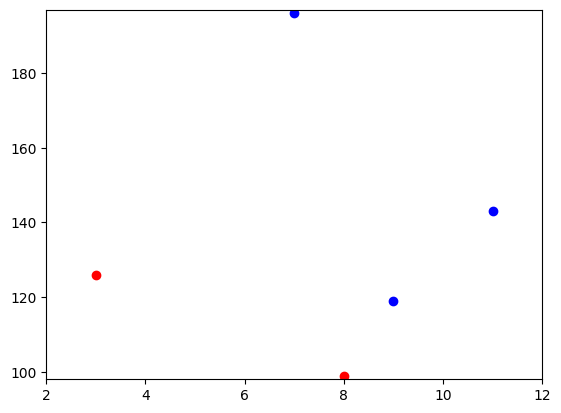

Bobot: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


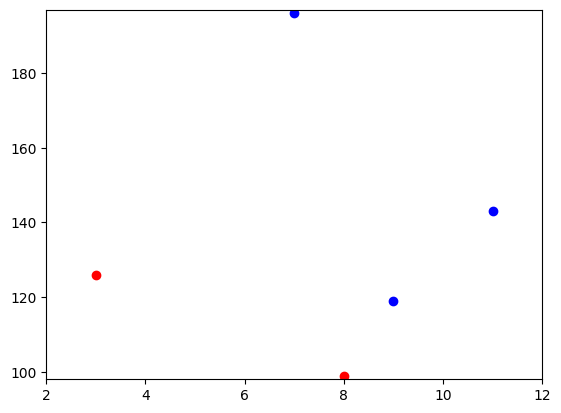

Bobot: [1.0, 7.0, 196.0, 90.0, 0.0, 0.0, 39.8, 0.451, 41.0]


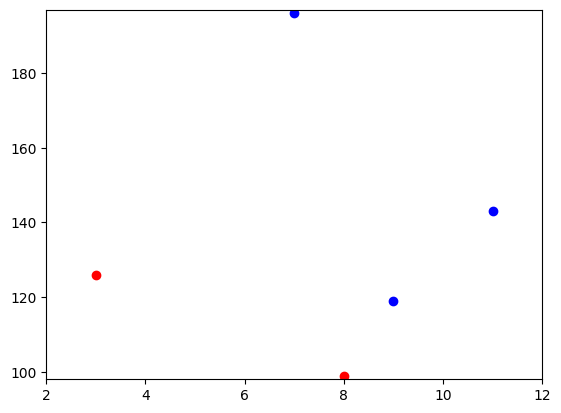

Bobot: [2.0, 16.0, 315.0, 170.0, 35.0, 0.0, 68.8, 0.714, 70.0]


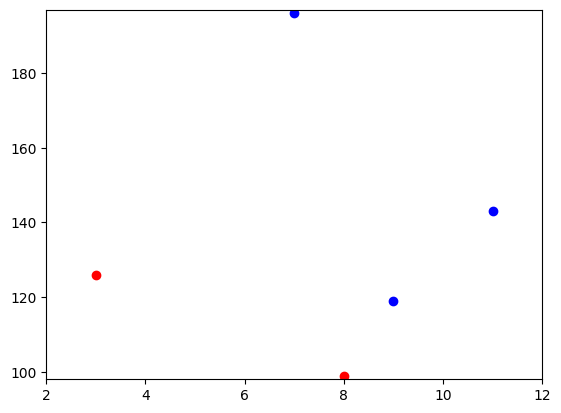

Bobot: [3.0, 27.0, 458.0, 264.0, 68.0, 146.0, 105.4, 0.968, 121.0]


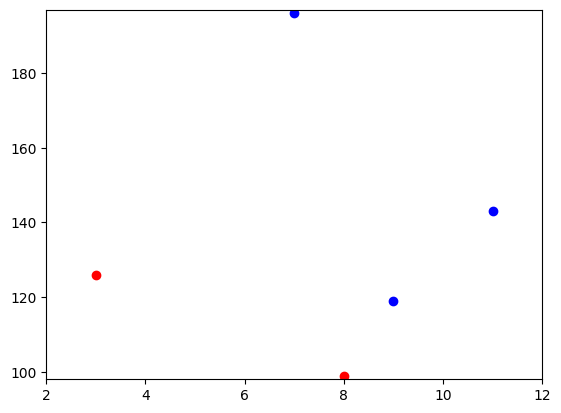

Output: [1, 1, 1, 1, 1]
Target: [0 0 1 1 1]
Accuracy: 0.6


In [30]:
#isilah array train oleh praktikan berdasarkan nilai data pada baris data ke-21 sampai ke-25
train = np.array([
    data.iloc[0, :-1].values.tolist(), # Access rows 0-4 in the sliced DataFrame
    data.iloc[1, :-1].values.tolist(),
    data.iloc[2, :-1].values.tolist(),
    data.iloc[3, :-1].values.tolist(),
    data.iloc[4, :-1].values.tolist()
])

#isilah array target oleh praktikan berdasarkan nilai data pada baris data ke-21 sampai ke-25
target = np.array(data.iloc[0:5, -1].values.tolist()) # Access rows 0-4 in the sliced DataFrame

model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)